# Proyecto final de la Primera Evaluación
Este proyecto tiene como finalidad el entrenamiento y configuración de un modelo de Regresión Lineal simple y múltiple.

In [1]:
import pandas as pd
import numpy as np

from seaborn import FacetGrid, scatterplot, histplot, boxplot, heatmap
from matplotlib.pyplot import show

from sklearn.preprocessing import MinMaxScaler 

In [2]:
path = '../data/datains_e.xlsx'
df = pd.read_excel(path)

## Estudio estructural de la base de datos 
Voy a utilizar un par de métodos de la librería `pandas` que me permitan observar la estructura de los datos dentro de la base de datos importada. 

*Inciso*:
Debemos eliminar la variable **index** del DataFrame puesto que no va a ser utilizada. Lo podemos hacer con la función `drop()`.

In [3]:
df = df.drop(labels='index', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       196 non-null    float64
 1   sex       198 non-null    object 
 2   bmi       196 non-null    float64
 3   children  199 non-null    float64
 4   smoker    197 non-null    object 
 5   region    200 non-null    object 
 6   charges   200 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.1+ KB


### Análisis
Como se puede observar, contamos con **7 columnas** en una tabla con un total de **200 registros**.

**4** de las 7 columnas (`age`, `sex`, `bmi`, `children`, `smoker`) cuentan **valores nulos** que deberemos tratar más adelante.

Como indica `dtypes` en el informe, contamos con **4 variables númericas** y **3 variables categóricas** que tendremos que codificar posteriormente para estudiar su correlación con el **target**. 

En este caso, nuestra **variable objetivo o target** es el importe del seguro (`charge`) que depende del resto de variables; las **features o variables objetivo**.

Ahora, voy a obsevar también algunas **medidas estadísticas** que serán útiles a la hora de hacer el **escalado de valores**.

In [5]:
# Tabla con medidas estadísticas básicas para cada variable numérica
df.describe()

,age,bmi,children,charges
count,196.000000,196.000000,199.000000,200.000000
mean,39.948980,32.417857,1.075377,13790.512035
std,13.752294,22.629577,1.118868,12195.955051
min,18.000000,16.815000,0.000000,1121.873900
25%,27.750000,26.407500,0.000000,5451.159125
50%,40.000000,30.800000,1.000000,9526.937700
75%,51.000000,34.900000,2.000000,17610.229900
max,64.000000,334.700000,5.000000,52590.829390


## EDA (Análisis Exploratorio de Datos) 
Una vez estudiada la estrucutra básica de los datos, debemos realizar el EDA. Este proceso va a consistir en los siguientes pasos:
- Análisis descriptivo.
- Codificación de variables categóricas.
- Identificación y tratamiento de valores nulos -> **valores NaN**.
- Identificación y tratamiento de valores atípicos -> **outliers**.
- Escalado de los datos.
- Estudio de correlación entre las variables de la base de datos.

### Análisis descriptivo
En este proceso, voy a obsevar la **distribución de los datos** utilizando los **histogramas** y también su **concentración** a través de **diagramass de caja y bigote**. 
Para ello, voy a utilizar las funciones `histplot` y `boxplot` de la librería `seaborn`.

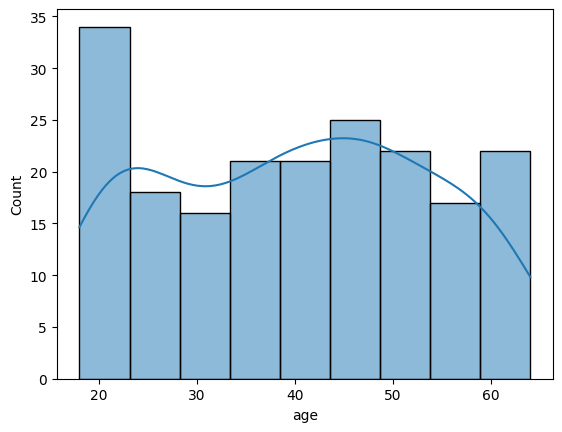

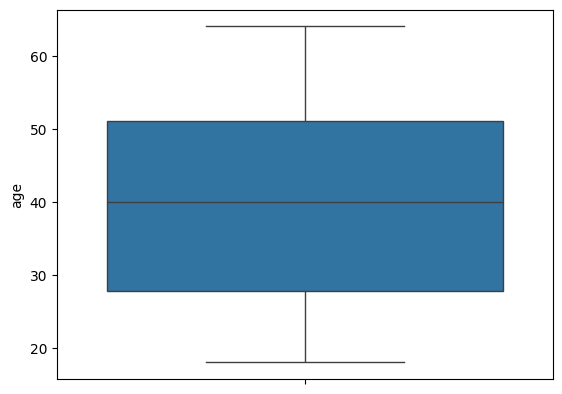

In [6]:
# Para la variable 'age'
col = 'age'
histplot(df[col], kde=True)
show()
boxplot(df[col])
show()

Para la variable **'age'**, los datos están basatante concetrados como muestran ambos gráficos. También se puede observar la ausencia de **outliers** y cierta asimetría en la distribución de los datos, pero sin presencia de un sesgo aparente.

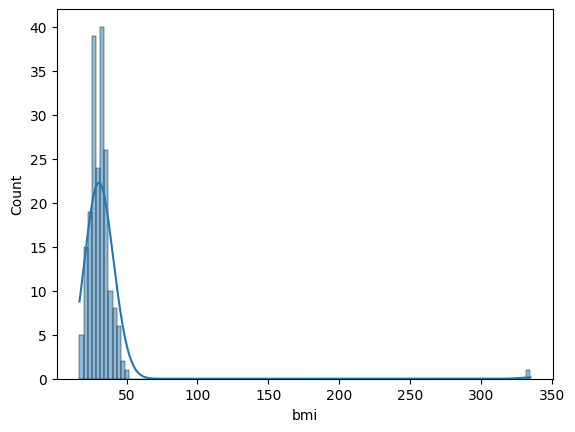

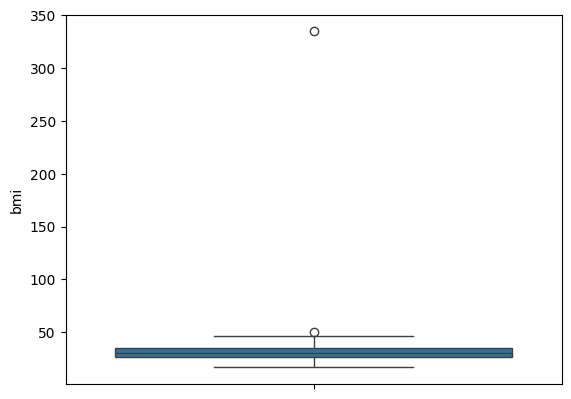

In [7]:
# Para la variable 'bmi'
col = 'bmi'
histplot(df[col], kde=True)
show()
boxplot(df[col])
show()

Para la variable **'bmi'**, la presencia de **outliers** es claramente notable. En la propia distribución de los datos se puede observar un valor que se encuentra completamente fuera del rango normal de los valores. Esto también se observa dentro del diagrama de caja y bigote que se encuentra debajo, donde encontramos al menos otro outlier más cercano al resto de valores. 

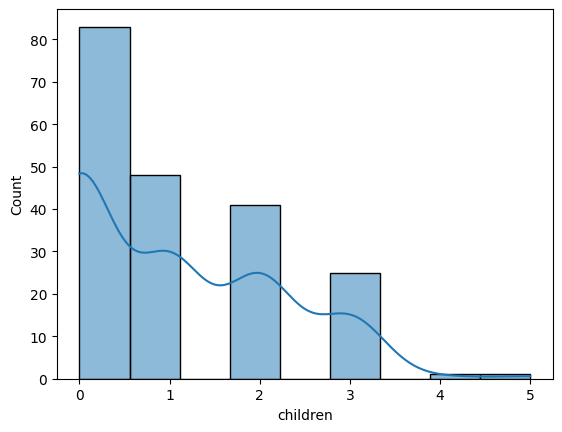

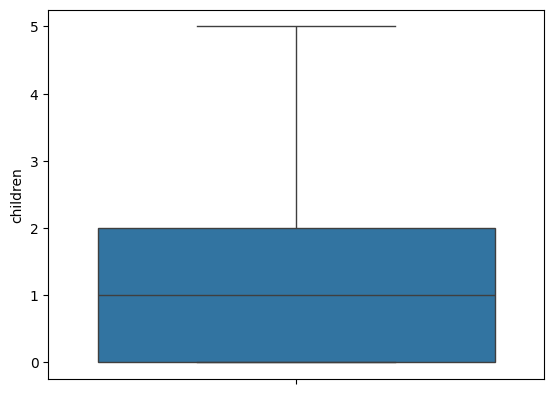

In [8]:
# Para la variable 'children'
col = 'children'
histplot(df[col], kde=True)
show()
boxplot(df[col])
show()

Para la variable **'children'**, encontramos una variable numérica discreta, ya que sólo toma valores dentro del rango [0, 5]. Podemos observar asimetría en la distribución de los datos, sesgada hacia la izquierda. Es notable también en los dos gráficos que la concentración de los datos la encontramos principalmente dentro del rango [0, 2], siendo 4 y 5 los valores más altos que puede tomar. En este caso no hay outliers al ser valores que se situán dentro de un rango razonable. 

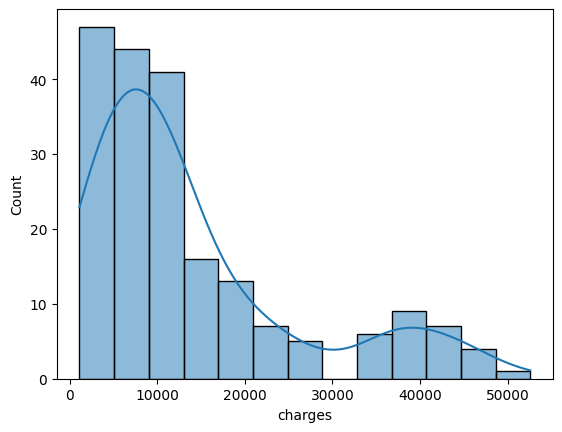

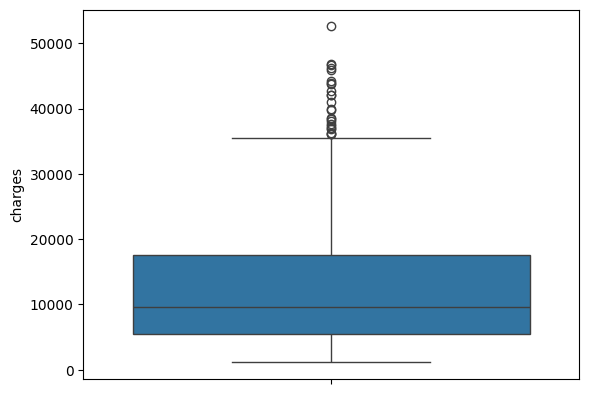

In [9]:
# Para la variable 'charges'
col = 'charges'
histplot(df[col], kde=True)
show()
boxplot(df[col])
show()

Para la variable **'charges'**, observamos una distribución similar a la anterior. Presenta asimetría positiva ya que está sesgada hacia la derecha. Se observa una gran concentración entre los valores **0 y 30000**. El resto de valores, como se representa en el diagrama de caja y bigote son outliers. En este caso, algunos de los valores atípicos podrían tratarse sólo de importes muy altos del seguro y teniendo en cuenta el bajo número de registros, no sería conveniente eliminar todos los outliers. 

De las variables categóricas podemos estudiar la medida estadística de la **moda**.

Puesto que ya contamos con la función `histplot` para representar diagramas de barras, podemos representar el recuento de valores que toma la variable categórica y de ahí sacar su moda.

<Axes: xlabel='region', ylabel='Count'>

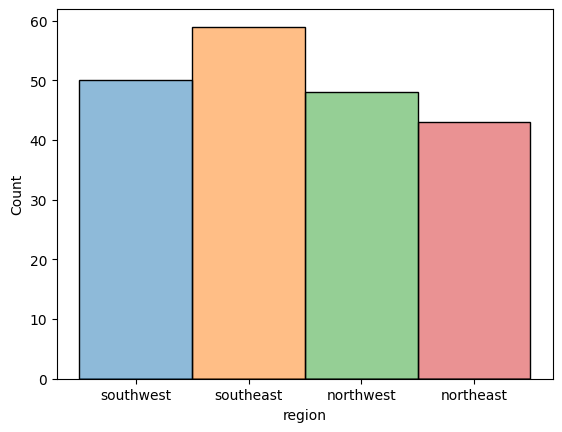

In [10]:
# Para la variable 'region'
col = df['region']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'region'**, la tendencia a vivir es en el suroeste, ya que la moda para esta variable es **'southeast'**.

<Axes: xlabel='sex', ylabel='Count'>

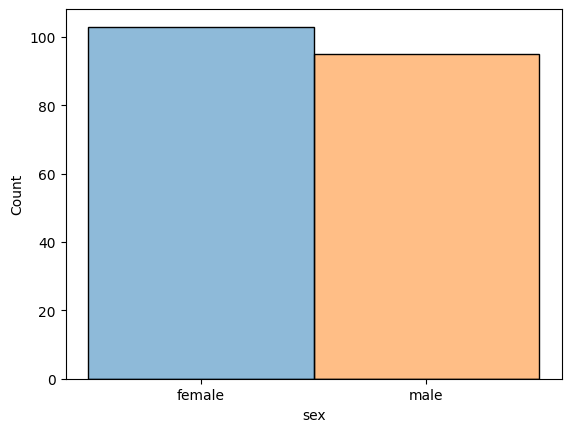

In [11]:
# Para la variable 'sex'
col = df['sex']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'sex'**, se observa que la mayoría de contrataciones están realizadas por mujeres, puesto que la moda de esta variable es **'female'**.

<Axes: xlabel='smoker', ylabel='Count'>

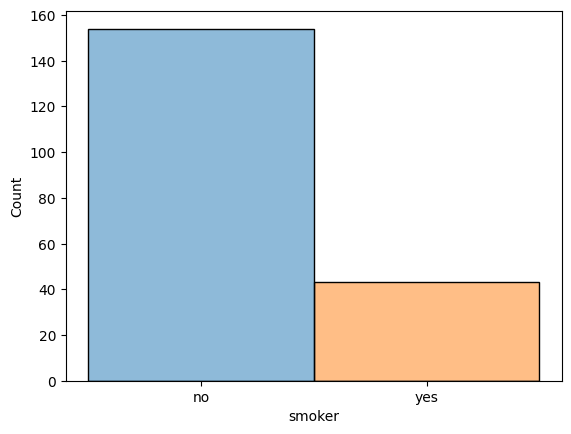

In [12]:
# Para la variable 'smoker'
col = df['smoker']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'smoker'**, se observa una mayor tendencia a **no** ser fumador que a que sí, dado que la moda claramente para esta variable es **'no'**.

## Codificación de variables categóricas
Como había expuesto antes en la descripción estructural de los datos, contamos con **3 variables categóricas** a codificar dentro de nuestro DataFrame: `smoker`, `sex` y `region`.

Para las variables `sex` y `smoker` puesto que son de carácter binario, podemos emplear un simple mapeo de los valores categóricos a valores binarios utilizando la función `map` de `pandas`. 

Para la variable `region`, puesto que no presenta este carácter binario, podemos emplear el procedimiento de *dummieficación*. A través de este procedimiento, se genrarán **4 columnas** de carácter binario que indicarán el valor de `region` que toma un registro *x*. Una de las columnas podemos eliminarla debido a que se puede intuir su valor en función del valor de las restantes.

In [13]:
# Codificación de las variables 'sex' y 'smoker'
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [14]:
# Codificación de la variable `region` por "dummieficación"
df = pd.get_dummies(data=df, columns=['region'], prefix='reg', drop_first=True, dtype='uint8')
df

,age,sex,bmi,children,smoker,charges,reg_northwest,reg_southeast,reg_southwest
0,23.0,0.0,33.400,0.0,0.0,10795.93733,0,0,1
1,18.0,1.0,23.210,0.0,0.0,1121.87390,0,1,0
2,49.0,0.0,29.925,0.0,0.0,8988.15875,1,0,0
3,57.0,1.0,NaN,0.0,0.0,11353.22760,1,0,0
4,64.0,1.0,34.500,0.0,0.0,13822.80300,0,0,1
...,...,...,...,...,...,...,...,...,...
195,55.0,0.0,25.365,3.0,0.0,13047.33235,0,0,0
196,30.0,1.0,24.400,3.0,1.0,18259.21600,0,0,1
197,47.0,1.0,28.215,3.0,1.0,24915.22085,1,0,0
198,34.0,1.0,30.800,0.0,1.0,35491.64000,0,0,1


Al habler implementado las versiones codificadas de `sex` y `smoker` dentro del `DataFrame`, podemos asignar directamente el `DataFrame` devuelto por la función `get_dummies()` al `DataFrame` original, puesto que ya contiene todas las variables codificadas correctamente.

## Tratamiento de valores nulos o NaN
Ahora que todas las variables están codificadas, voy a **imputar** aquellos valores **faltantes o nulos** presentes en el `DataFrame`.

Voy a realizar un recuento y visualización de los valores nulos a través de funciones de `pandas` y el mapa de calor de `seaborn`.

In [15]:
# Para ver un informe con el recuento de valores nulos presentes en el DataFrame 
df.isnull().sum()

age              4
sex              2
bmi              4
children         1
smoker           3
charges          0
reg_northwest    0
reg_southeast    0
reg_southwest    0
dtype: int64

<Axes: >

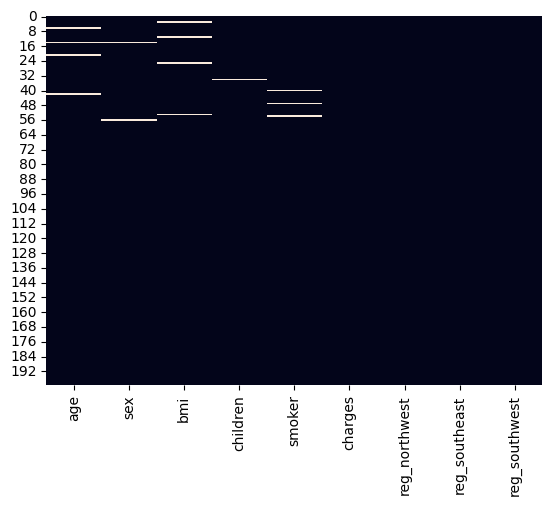

In [16]:
# Para observar los nulos en un mapa de calor utiliznado heatmap 
heatmap(data=df.isnull(), cbar=False)

En este caso contamos con una **baja cantidad** de valores nulos, por lo que el coste de computación a la hora de **imputarlos** será muy pequeño.

Mi plan de imputación es el siguiente:
- Para las variables numéricas discretas: `sex`, `smoker`, `children`; voy a imputar los valores nulos a la **moda** puseto que tomando un conjunto finito de valores y muy reducido es lo más coherente para completar el modelo.

- Para las variables numéricas continuas: `bmi`, `age`; voy a imputar los valores nulos a la **media**, puesto que utilizar la técnica de imputación por los *k-vecinos más cercanos* sería muy costoso e incoherente, ya que los registros cercanos no tienen relación directa con los registros nulos. 

In [17]:
# Imputación de las variables numéricas discretas 
df['sex'].fillna(value=df['sex'].mode()[0], inplace=True)
df['smoker'].fillna(value=df['smoker'].mode()[0], inplace=True)
df['children'].fillna(value=df['children'].mode()[0], inplace=True)

In [18]:
# Imputación de las variables numéricas continuas 
df['age'].fillna(value=df['age'].mean(), inplace=True)
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

Ahora que los valores están imputados, podemos volver a comprobar que no haya restos de valores nulos trazando de nuevo el **mapa de calor anterior**. 

<Axes: >

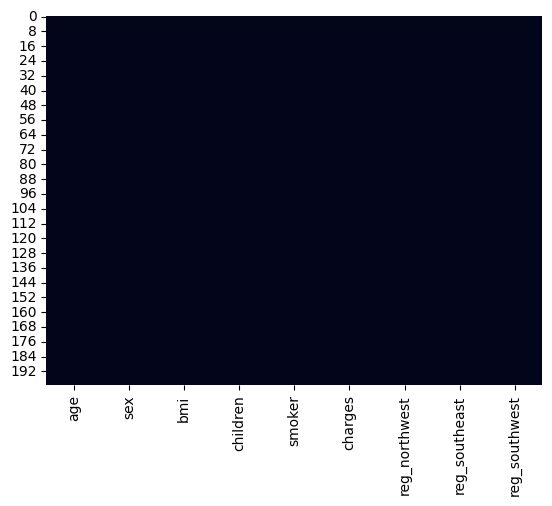

In [19]:
heatmap(df.isnull(), cbar=False)

Como se puede observar, los valores nulos ya han sido imputados correctamente.

## Tratamiento de outliers
Ya había detectado anteriormente los outliers en las variables `charges` y `bmi`. 
Voy a representar sus diagramas de caja y bigote de nuevo para analizar las posibilidades de tratamiento:

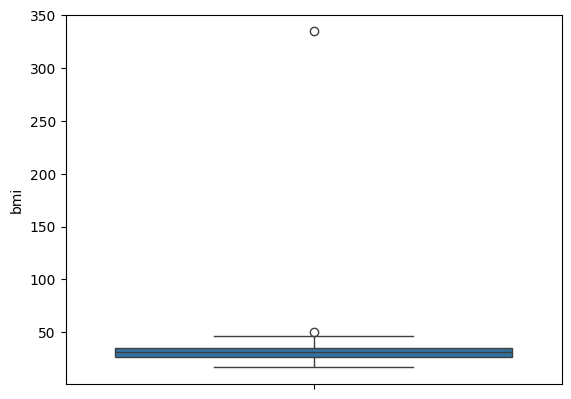

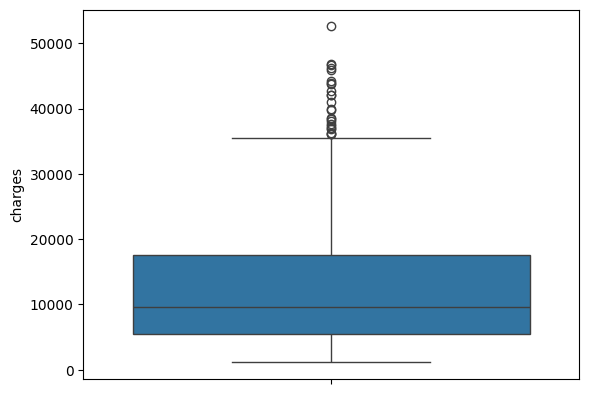

In [20]:
# Representación de los diagramas de caja y bigote
boxplot(df['bmi'])
show()
boxplot(df['charges'])
show()

Se pueden observar claramente al menos un valor en cada variable que se **desvía de la media en demasía**. Es evidente que este valor desorbitado corresponde con el valor **máximo** que toma la variable en ambos casos. Por lo que de una forma muy simple puedo filtrar dichos valores aprovechando la implementación de operadores de comparación dentro de los **arrays de numpy**.

*Anotación: ver si hay alguna manera de eliminar los valores claramente atípicos*

In [21]:
df.drop(df[df['bmi'] == df['bmi'].max()].index, inplace=True)
df.drop(df[df['charges'] > df['charges'].quantile(q=0.75) + 1.5*(df['charges'].quantile(q=0.75) - df['charges'].quantile(q=0.25))].index, inplace=True)
df

,age,sex,bmi,children,smoker,charges,reg_northwest,reg_southeast,reg_southwest
0,23.0,0.0,33.400000,0.0,0.0,10795.93733,0,0,1
1,18.0,1.0,23.210000,0.0,0.0,1121.87390,0,1,0
2,49.0,0.0,29.925000,0.0,0.0,8988.15875,1,0,0
3,57.0,1.0,32.417857,0.0,0.0,11353.22760,1,0,0
4,64.0,1.0,34.500000,0.0,0.0,13822.80300,0,0,1
...,...,...,...,...,...,...,...,...,...
194,48.0,0.0,32.230000,1.0,0.0,8871.15170,0,1,0
195,55.0,0.0,25.365000,3.0,0.0,13047.33235,0,0,0
196,30.0,1.0,24.400000,3.0,1.0,18259.21600,0,0,1
197,47.0,1.0,28.215000,3.0,1.0,24915.22085,1,0,0


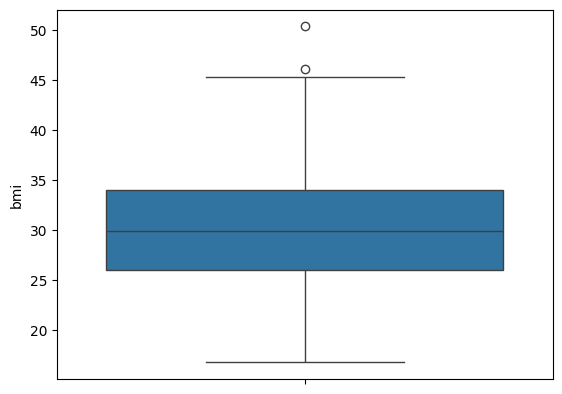

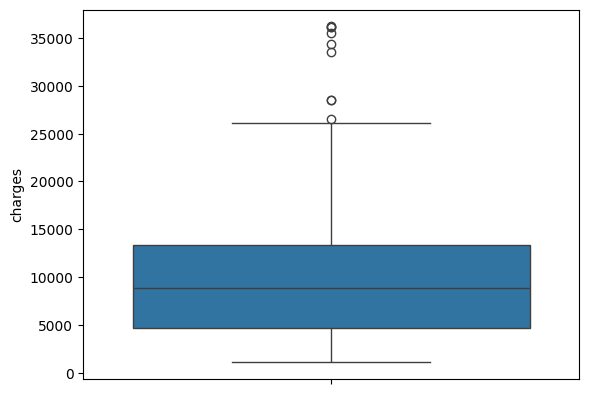

In [22]:
# Representación de los diagramas de caja y bigote
boxplot(df['bmi'])
show()
boxplot(df['charges'])
show()

## Escalado de características 
El último paso para el tratamiento de los datos es el **escalado de características** que será útil a la hora de realizar el modelo, para que no otorge más peso a aquellas variables con un mayor rango.

In [23]:
scaler = MinMaxScaler()
df['bmi'] = scaler.fit_transform(df['bmi'].to_numpy().reshape(-1, 1))
df['age'] = scaler.fit_transform(df['age'].to_numpy().reshape(-1, 1))
df['charges'] = scaler.fit_transform(df['charges'].to_numpy().reshape(-1, 1))

df

,age,sex,bmi,children,smoker,charges,reg_northwest,reg_southeast,reg_southwest
0,0.108696,0.0,0.494116,0.0,0.0,0.275872,0,0,1
1,0.000000,1.0,0.190526,0.0,0.0,0.000000,0,1,0
2,0.673913,0.0,0.390585,0.0,0.0,0.224320,1,0,0
3,0.847826,1.0,0.464855,0.0,0.0,0.291764,1,0,0
4,1.000000,1.0,0.526888,0.0,0.0,0.362188,0,0,1
...,...,...,...,...,...,...,...,...,...
194,0.652174,0.0,0.459258,1.0,0.0,0.220983,0,1,0
195,0.804348,0.0,0.254730,3.0,0.0,0.340074,0,0,0
196,0.260870,1.0,0.225979,3.0,1.0,0.488700,0,0,1
197,0.630435,1.0,0.339640,3.0,1.0,0.678507,1,0,0


<Axes: >

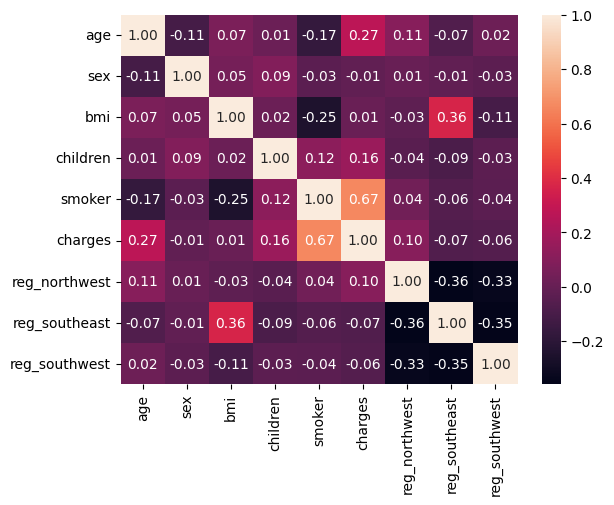

In [24]:
heatmap(df.corr(), annot=True, fmt='.2f')